In [426]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#library 
from src.viz import data_overview

In [464]:
def overview(df):
    df_overview = pd.DataFrame({})
    name_col = []
    for name, df in zip(data_names, data):
        name_col += [name] * df.shape[1]
        df_temp = data_overview(df)
        df_overview = pd.concat([df_overview, df_temp], ignore_index=True)

    df_overview['datasets'] = name_col
    cols = df_overview.columns.tolist()
    cols.insert(0, cols.pop(cols.index('datasets')))
    df_overview = df_overview.reindex(columns=cols)
    
    return df_overview

def boxplot(df, title):
    plt.figure(figsize=(15,3))
    plt.title('Outliers of ' + title)
    sns.boxplot(x=df, color='red')
    plt.show()

def segmen_freq(x):
    if x == 1:
        return 1
    elif x <= 4 and x > 1:
        return 2
    elif x <= 6 and x > 4:
        return 3
    elif x <= 8 and x > 6:
        return 4
    else:
        return 5
    
def segmen_score(x):
    if x >= 13:
        return 'Platinum'
    elif x < 13 and x >= 10:
        return 'Gold'
    elif x < 10 and x >= 7:
        return 'Silver'
    else:
        return 'Bronze'


In [428]:
#path
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_cat_name = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

In [429]:
data = [customers, geolocation, orders, order_items, order_payments, 
        order_reviews, product_cat_name, products, sellers ]

In [430]:
data_names = ['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 
         'order_reviews', 'product_cat_name', 'products', 'sellers' ]

In [471]:
df = pd.DataFrame({})

df['datasets'] = data_names
df['rows'] = [df.shape[0] for df in data]
df['column'] = [df.shape[1] for df in data]
df


,datasets,rows,column
0,customers,99441,5
1,geolocation,1000163,5
2,orders,99441,8
3,order_items,112650,7
4,order_payments,103886,5
5,order_reviews,99224,7
6,product_cat_name,71,2
7,products,32951,9
8,sellers,3095,4


In [ ]:
df_overview = overview(df)
df_overview

# let's do segmentation

In [24]:
# gabungkan customer id dan order

In [473]:
df_orders = pd.merge(customers, orders, how ='left', on='customer_id')
df_orders = pd.merge(df_orders, order_items, how ='left', on='order_id')

col = ['customer_unique_id', 'price', 'order_item_id', 'order_purchase_timestamp']
df_orders = df_orders[col]

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])


In [474]:
data_max = pd.to_datetime(df_orders['order_purchase_timestamp'].max())
data_min = df_orders['order_purchase_timestamp'].min()
total = (data_max - data_min).total_seconds()
print('Data terakhir: ' + str(data_max))
print('Data pertama : ' + str(data_min)) 

Data terakhir: 2018-10-17 17:30:18
Data pertama : 2016-09-04 21:15:19


In [475]:
total_year = total / (3600 * 24 * 365)
total_month = total / (3600 * 24 * 30)
print(str(round(total_month)) + ' months')
print(str(round(total_year)) + ' years')

26 months
2 years


In [476]:
df_orders

,customer_unique_id,price,order_item_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,124.99,1.0,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,289.00,1.0,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,139.94,1.0,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,149.94,1.0,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,230.00,1.0,2018-07-29 09:51:30
...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,74.90,1.0,2018-04-07 15:48:17
113421,d52a67c98be1cf6a5c84435bd38d095d,114.90,1.0,2018-04-04 08:20:22
113422,e9f50caf99f032f0bf3c55141f019d99,37.00,1.0,2018-04-08 20:11:50
113423,73c2643a0a458b49f58cea58833b192e,689.00,1.0,2017-11-03 21:08:33


In [477]:
df_orders_uniq = pd.DataFrame(df_orders['customer_unique_id'].unique())
df_orders_uniq.columns = ['customer_unique_id']
df_orders_uniq

,customer_unique_id
0,861eff4711a542e4b93843c6dd7febb0
1,290c77bc529b7ac935b93aa66c333dc3
2,060e732b5b29e8181a18229c7b0b2b5e
3,259dac757896d24d7702b9acbbff3f3c
4,345ecd01c38d18a9036ed96c73b8d066
...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8
96092,d52a67c98be1cf6a5c84435bd38d095d
96093,e9f50caf99f032f0bf3c55141f019d99
96094,73c2643a0a458b49f58cea58833b192e


# Recency

In [478]:
order_lastpurchase = df_orders.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
order_lastpurchase.columns = ['customer_unique_id','last_purchase_date']
order_lastpurchase['Recency'] = (order_lastpurchase['last_purchase_date'].max() - order_lastpurchase['last_purchase_date']).dt.days
df_orders_rec = pd.merge(df_orders_uniq, order_lastpurchase[['customer_unique_id','Recency']], on='customer_unique_id')
df_orders_rec

,customer_unique_id,Recency
0,861eff4711a542e4b93843c6dd7febb0,519
1,290c77bc529b7ac935b93aa66c333dc3,277
2,060e732b5b29e8181a18229c7b0b2b5e,151
3,259dac757896d24d7702b9acbbff3f3c,218
4,345ecd01c38d18a9036ed96c73b8d066,80
...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,193
96092,d52a67c98be1cf6a5c84435bd38d095d,196
96093,e9f50caf99f032f0bf3c55141f019d99,191
96094,73c2643a0a458b49f58cea58833b192e,347


# frequency 

In [479]:
df_orders_freq = df_orders.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_orders_freq.columns = ['customer_unique_id','Frequency']
df_orders_freq = pd.merge(df_orders_uniq, df_orders_freq, on='customer_unique_id')
df_orders_freq

,customer_unique_id,Frequency
0,861eff4711a542e4b93843c6dd7febb0,1
1,290c77bc529b7ac935b93aa66c333dc3,1
2,060e732b5b29e8181a18229c7b0b2b5e,1
3,259dac757896d24d7702b9acbbff3f3c,1
4,345ecd01c38d18a9036ed96c73b8d066,1
...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,1
96092,d52a67c98be1cf6a5c84435bd38d095d,1
96093,e9f50caf99f032f0bf3c55141f019d99,1
96094,73c2643a0a458b49f58cea58833b192e,1


# Monetary

In [481]:
df_orders.loc[:, 'Monetary'] = df_orders.loc[:, 'price'] * df_orders.loc[:, 'order_item_id']
df_monetary = df_orders.groupby('customer_unique_id').Monetary.sum().reset_index()
df_monetary = pd.merge(df_orders_uniq, df_monetary, on='customer_unique_id')
df_monetary

,customer_unique_id,Monetary
0,861eff4711a542e4b93843c6dd7febb0,124.99
1,290c77bc529b7ac935b93aa66c333dc3,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,139.94
3,259dac757896d24d7702b9acbbff3f3c,149.94
4,345ecd01c38d18a9036ed96c73b8d066,230.00
...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,74.90
96092,d52a67c98be1cf6a5c84435bd38d095d,114.90
96093,e9f50caf99f032f0bf3c55141f019d99,37.00
96094,73c2643a0a458b49f58cea58833b192e,689.00


# Merge

In [485]:
df_rfm = df_orders_rec.merge(df_orders_freq, on='customer_unique_id').merge(df_monetary, on='customer_unique_id')
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00
...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,193,1,74.90
96092,d52a67c98be1cf6a5c84435bd38d095d,196,1,114.90
96093,e9f50caf99f032f0bf3c55141f019d99,191,1,37.00
96094,73c2643a0a458b49f58cea58833b192e,347,1,689.00


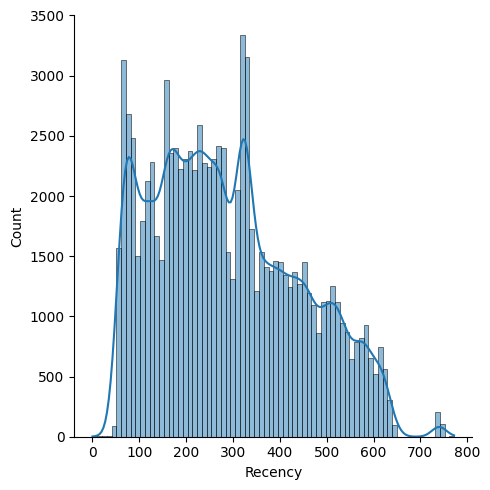

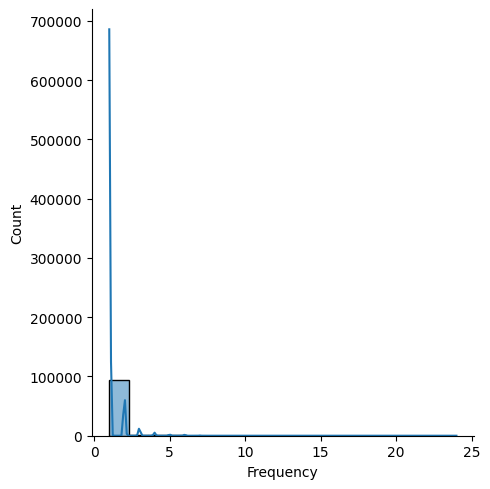

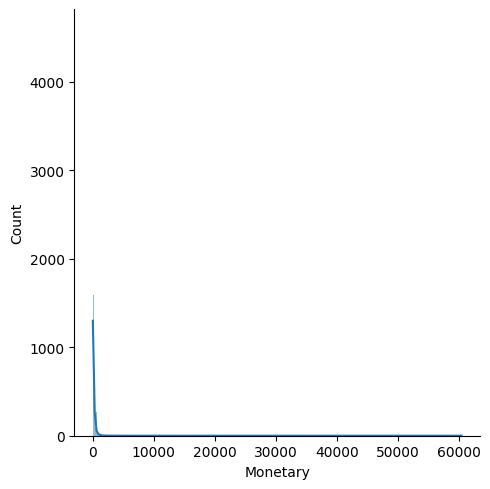

In [486]:
sns.displot(df_rfm['Recency'], kde=True)
sns.displot(df_rfm['Frequency'], kde=True)
sns.displot(df_rfm['Monetary'], kde=True)
plt.show()

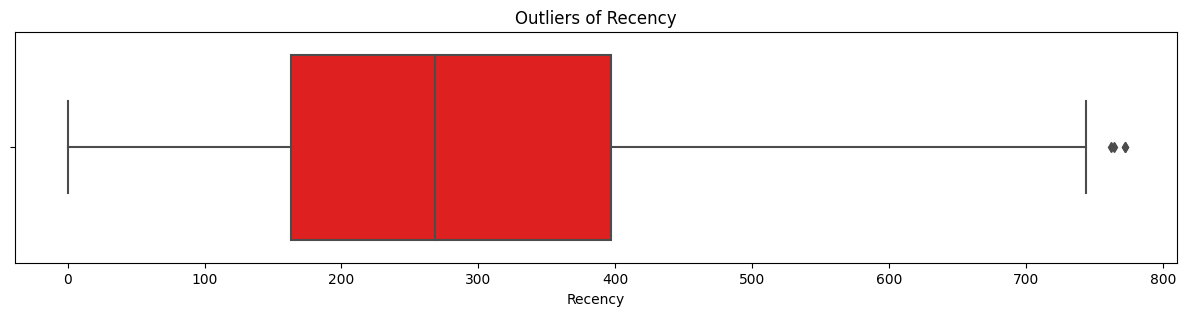

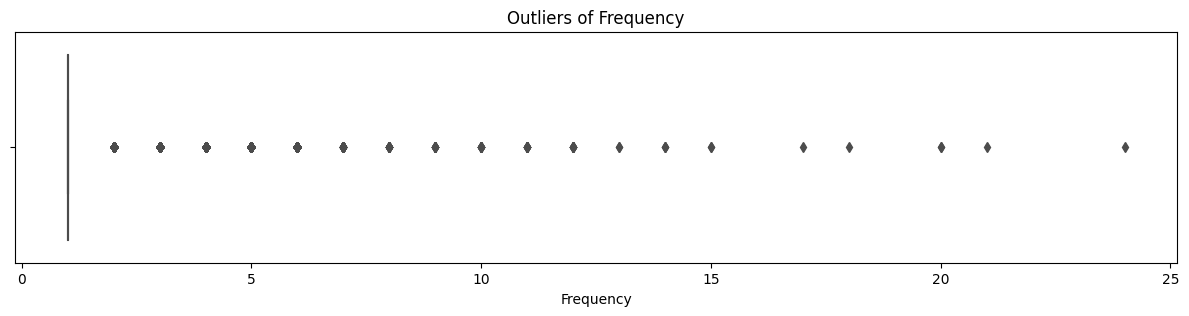

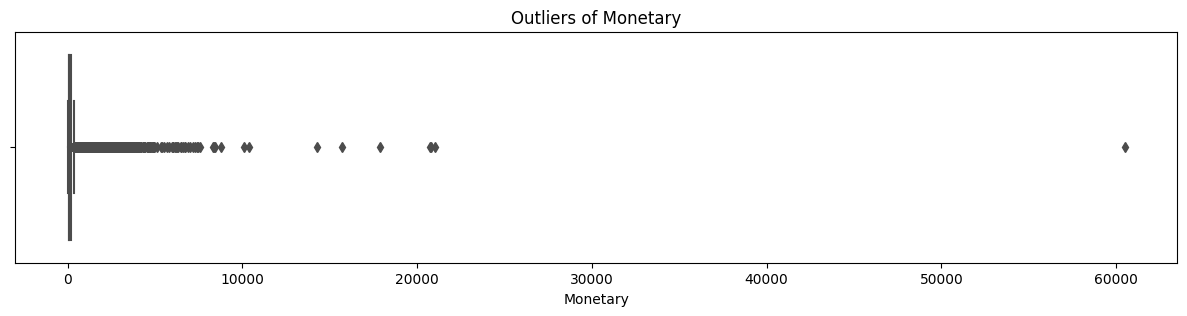

In [487]:
boxplot(df_rfm['Recency'], 'Recency')
boxplot(df_rfm['Frequency'],'Frequency')
boxplot(df_rfm['Monetary'],'Monetary')

In [ ]:
"""
The distribution visualization of the data shows that the Frequency and Monetary features are 
skewed, with a high proportion of the data concentrated at one end. Due to this, machine learning
models may not be suitable for clustering and segmentation. A percentile and rule-based segmentation 
method will be used
"""
# if else based rule will be implemented to segment the customers
#https://github.com/gstdl/e-commerce-Customer-RFM-Analysis/blob/master/rfm-analysis.ipynb

In [496]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.180330,160.232878
std,153.414676,0.620748,371.165615
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,47.900000
50%,268.000000,1.000000,89.900000
75%,397.000000,1.000000,166.800000
max,772.000000,24.000000,60480.000000


In [500]:
#using percentiles
r_labels = range(5, 0, -1)
m_labels = range(1, 6)
r_groups = pd.qcut(df_rfm['Recency'], q=5, labels=r_labels)
m_groups = pd.qcut(df_rfm['Monetary'], q=5, labels=m_labels)

#using rule=based
f_groups = df_rfm['Frequency'].apply(lambda x: segmen_freq(x)).astype('category')

In [501]:
df_rfm_score = df_rfm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)
df_rfm_score

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99,1,1,4
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00,3,1,5
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94,4,1,4
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94,4,1,4
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00,5,1,5
...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,193,1,74.90,4,1,3
96092,d52a67c98be1cf6a5c84435bd38d095d,196,1,114.90,4,1,3
96093,e9f50caf99f032f0bf3c55141f019d99,191,1,37.00,4,1,1
96094,73c2643a0a458b49f58cea58833b192e,347,1,689.00,2,1,5


In [502]:
df_rfm_score['RFM_Score'] = df_rfm_score[['R','F','M']].sum(axis=1)
df_rfm_score.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99,1,1,4,6
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00,3,1,5,9
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94,4,1,4,9
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94,4,1,4,9
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00,5,1,5,11
5,4c93744516667ad3b8f1fb645a3116a4,367,2,506.52,2,2,5,9
6,addec96d2e059c80c30fe6871d30d177,240,1,14.99,3,1,1,5
7,57b2a98a409812fe9618067b6b8ebe4f,334,1,19.90,2,1,1,4
8,1175e95fb47ddff9de6b2b06188f7e0d,272,2,54.99,3,2,2,7
9,9afe194fb833f79e300e37e580171f22,282,1,99.90,3,1,3,7


In [504]:
df_rfm_score.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})/ round(1)

Recency  Frequency     Monetary         
                 mean       mean         mean    count
RFM_Score                                             
3          527.742097   1.000000    24.281452   4207.0
4          443.036178   1.009176    39.962230   7629.0
5          381.576702   1.023942    55.462889  11486.0
6          330.716657   1.040972    75.710365  14156.0
7          278.909368   1.067932   132.838783  17709.0
8          245.212703   1.177638   185.512536  15115.0
9          199.376270   1.277422   222.281013  11715.0
10         158.046778   1.370569   293.894686   8209.0
11         124.494843   1.645657   448.924226   4363.0
12         106.461310   2.767857   618.898237   1344.0
13         125.533333   6.333333  1674.635250    120.0
14         147.071429   9.178571  2935.924286     28.0
15         104.533333  11.800000  2348.450000     15.0

In [507]:
# add general segmentation
df_rfm_score['General_Segment'] = df_rfm_score['RFM_Score'].apply(segmen_score)

In [508]:
df_rfm_score

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,General_Segment
0,861eff4711a542e4b93843c6dd7febb0,519,1,124.99,1,1,4,6,Bronze
1,290c77bc529b7ac935b93aa66c333dc3,277,1,289.00,3,1,5,9,Silver
2,060e732b5b29e8181a18229c7b0b2b5e,151,1,139.94,4,1,4,9,Silver
3,259dac757896d24d7702b9acbbff3f3c,218,1,149.94,4,1,4,9,Silver
4,345ecd01c38d18a9036ed96c73b8d066,80,1,230.00,5,1,5,11,Gold
...,...,...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,193,1,74.90,4,1,3,8,Silver
96092,d52a67c98be1cf6a5c84435bd38d095d,196,1,114.90,4,1,3,8,Silver
96093,e9f50caf99f032f0bf3c55141f019d99,191,1,37.00,4,1,1,6,Bronze
96094,73c2643a0a458b49f58cea58833b192e,347,1,689.00,2,1,5,8,Silver


In [573]:
result_first = df_rfm_score.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
}).round(1)

In [574]:
result_first

Recency Frequency Monetary       
                   mean      mean     mean  count
General_Segment                                  
Bronze            391.3       1.0     56.5  37478
Gold              142.5       1.6    373.9  13916
Platinum          127.3       7.3   1953.3    163
Silver            246.6       1.2    174.2  44539

In [575]:
result_first.sort_values(('Frequency', 'mean'), ascending=False)

Recency Frequency Monetary       
                   mean      mean     mean  count
General_Segment                                  
Platinum          127.3       7.3   1953.3    163
Gold              142.5       1.6    373.9  13916
Silver            246.6       1.2    174.2  44539
Bronze            391.3       1.0     56.5  37478

In [576]:
(44539 + 37478) / 96096

0.8534902597402597

85% customer are low spender with avg spending less than 373

# clustering preparation

In [557]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,287.735691,1.180330,160.232878
std,153.414676,0.620748,371.165615
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,47.900000
50%,268.000000,1.000000,89.900000
75%,397.000000,1.000000,166.800000
max,772.000000,24.000000,60480.000000


In [566]:
df_temp = df_rfm.iloc[:,1:]
sse = {}

In [567]:
# Fit KMeans and calculate SSE for each k
for k in range(1, 12):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_temp)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

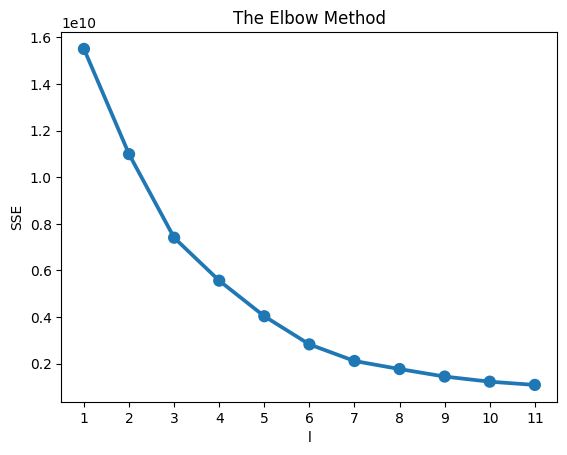

In [568]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('l')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [318]:
#without preprocessing

In [513]:
df_clus = df_frm.iloc[:,1:]

In [514]:
df_clus

,Recency,Frequency,Monetary
0,519,1,124.99
1,277,1,289.00
2,151,1,139.94
3,218,1,149.94
4,80,1,230.00
...,...,...,...
96091,193,1,74.90
96092,196,1,114.90
96093,191,1,37.00
96094,347,1,689.00


In [515]:
#kmeans clustering
kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(df_clus)
cluster_labels = kmeans.labels_

In [517]:
df_rfm_k5 = df_clus.assign(Cluster=cluster_labels)
grouped = df_rfm_k5.groupby(['Cluster'])

In [520]:
result = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

In [527]:
result

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         288.9       1.9   1002.9   3992
1         437.3       1.1    114.5  39101
2         383.0       8.0  60480.0      1
3         177.1       1.1    117.6  52885
4         287.4       5.5   5461.0    117

In [531]:
result_sorted = result.sort_values(('Recency', 'mean'), ascending=True)
result_sorted

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
3         177.1       1.1    117.6  52885
4         287.4       5.5   5461.0    117
0         288.9       1.9   1002.9   3992
2         383.0       8.0  60480.0      1
1         437.3       1.1    114.5  39101

In [ ]:
# using preprocessing

In [535]:
df_clus_2  = df_rfm.iloc[:,1:]
frm_customer = df_rfm['customer_unique_id']
df_clus_2

,Recency,Frequency,Monetary
0,519,1,124.99
1,277,1,289.00
2,151,1,139.94
3,218,1,149.94
4,80,1,230.00
...,...,...,...
96091,193,1,74.90
96092,196,1,114.90
96093,191,1,37.00
96094,347,1,689.00


In [537]:
# Unskew the data
df_clus_2_log = np.log(df_clus_2 + 1e-10)
# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(df_clus_2_log)
# Scale and center the data
df_clus_normalized = scaler.transform(df_clus_2)

df_clus_normalized = pd.DataFrame(data=df_clus_normalized, index=df_clus_2.index, 
                                   columns=df_clus_2.columns)

In [540]:
df_clus_normalized.describe()

,Recency,Frequency,Monetary
count,96096.000000,96096.000000,96096.000000
mean,443.218525,3.632785,62.296650
std,240.912681,2.095859,148.310940
min,-8.623361,3.023928,-1.729455
25%,247.341504,3.023928,17.410502
50%,412.226847,3.023928,34.192928
75%,614.800268,3.023928,64.920751
max,1203.676492,80.679874,24164.964058


In [543]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(df_clus_normalized)
cluster_labels = kmeans.labels_


In [544]:
df_clus_2

,Recency,Frequency,Monetary
0,519,1,124.99
1,277,1,289.00
2,151,1,139.94
3,218,1,149.94
4,80,1,230.00
...,...,...,...
96091,193,1,74.90
96092,196,1,114.90
96093,191,1,37.00
96094,347,1,689.00


In [570]:
# Create a DataFrame by adding a new cluster label column
df_clus_pr_k5 = df_clus_2.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = df_clus_pr_k5.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
result_2 = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

In [571]:
result_2

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         275.4       2.5   1924.8   1222
1         508.4       1.2    136.2  22432
2         135.7       1.2    137.9  36350
3         304.1       1.2    133.1  36085
4         244.6      13.1  24404.6      7

In [572]:
print(result)
print(result_2)

        Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         288.9       1.9   1002.9   3992
1         437.3       1.1    114.5  39101
2         383.0       8.0  60480.0      1
3         177.1       1.1    117.6  52885
4         287.4       5.5   5461.0    117
        Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         275.4       2.5   1924.8   1222
1         508.4       1.2    136.2  22432
2         135.7       1.2    137.9  36350
3         304.1       1.2    133.1  36085
4         244.6      13.1  24404.6      7
